# Legge dei punti coniugati

I dati sono presi da un'esperienza di laboratorio per la verifica della legge dei punti coniugati in ottica geometrica.

La legge è la seguente:

$\displaystyle \frac{1}{p} + \frac{1}{q} = \frac{1}{f}$

Nell'esperienza vengono misurati diversi valori di $p$ ed i corrispondenti $q$ con lo scopo di misurare $f$. Si calcolano quindi gli inversi di $p$ e $q$ e si propagani i corrispondenti errori.

Si eseque quindi una regressione lineare sulle variabili $x=1/p$ e $y=1/q$.

La presenza di errori, sia nella misura di $p$ (quindi di $x$) che di $q$ (quindi di $y$), non è in genere contemplata nelle procedure di regressione lineare.

Tuttavia, si può propagare l'errore su $x$ in base alla funzione di *fit* ed ottenere un contributo ulteriore all'errore su $y$. Il *fit* su può quindi iterare per ottenere una nuova stima, più accurata, con i suoi errori. La procedura iterativa si può ripetere fino ad ottenere un valore stabile dei parametri del fit.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/lab_ottica_punti_coniugati.csv')

In [4]:
df

,p,q,dp,dq,Q,P,1/f,dQ,dP
0,32.0,57.5,0.5,0.5,0.017391,0.031250,0.048641,0.000151,0.000488
1,42.0,38.5,0.5,0.5,0.025974,0.023810,0.049784,0.000337,0.000283
2,52.5,33.0,0.5,0.5,0.030303,0.019048,0.049351,0.000459,0.000181
3,62.5,29.5,0.5,0.5,0.033898,0.016000,0.049898,0.000575,0.000128
4,71.5,28.0,0.5,0.5,0.035714,0.013986,0.049700,0.000638,0.000098
5,87.0,25.5,0.5,0.5,0.039216,0.011494,0.050710,0.000769,0.000066
6,95.0,25.0,0.5,0.5,0.040000,0.010526,0.050526,0.000800,0.000055
7,105.0,24.5,0.5,0.5,0.040816,0.009524,0.050340,0.000833,0.000045
8,119.0,23.5,0.5,0.5,0.042553,0.008403,0.050957,0.000905,0.000035
9,144.5,22.5,0.5,0.5,0.044444,0.006920,0.051365,0.000988,0.000024


Grafichiamo $p$ *vs* $q$. Va notato che a questo punto avremmo gli strumenti per fare un fit direttamente di questi dati secondo la legge:

$\displaystyle q(p) = \frac{1}{\displaystyle\frac{1}{f}-\frac{1}{p}}$

$f$ sarebbe il parametro da determinare nel fit.

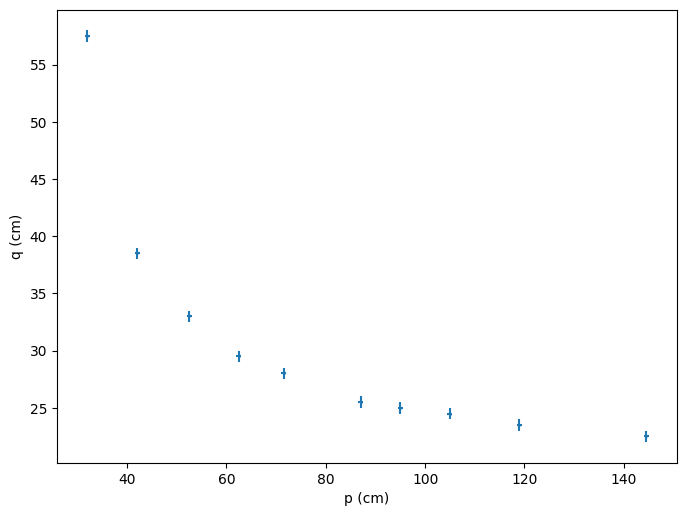

In [7]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.errorbar(df.p, df.q, xerr=df.dp, yerr=df.dq, marker='o', markersize=1, linestyle='')
ax.set_xlabel('p (cm)')
ax.set_ylabel('q (cm)')
fig.show()

Il problema si può linearizzare passando agli inversi dei valori misurati, ma si ottengono incertezze molto diverse tra di loro:

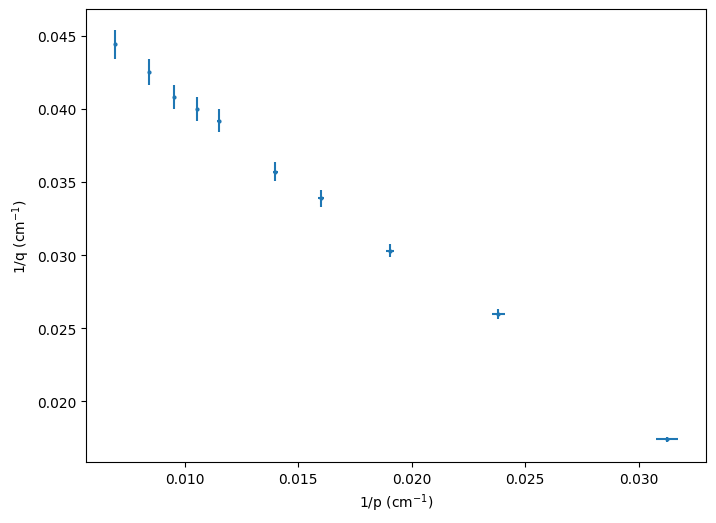

In [6]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.errorbar(df.P, df.Q, xerr=df.dP, yerr=df.dQ, marker='o', markersize=2, linestyle='')
ax.set_xlabel('1/p (cm$^{-1}$)')
ax.set_ylabel('1/q (cm$^{-1}$)')
fig.show()

Implementiamo un *fit* di minimo chi-quadro utilizzando ```curve_fit``` **senza** passare agli inversi dei valori misurati.

In prima battuta, ignoriamo gli errori sulla misura di $p$. Poi riconsideremo questi errori dopo questa prima implementazione.